# Markus Kankkonen Projekt 2 Datorseende

- Uppgift 1-2: Vi tar in 3 olika bilder och visar deras histogram.
- Vi använder oss av equalizeHist funktionen för att jämna ut våra luminans värden
- Som bonus har jag också implementerat en CLAHE (Contrast Limited Adaptive Histogram Equalization
) Som fungerar lite som equalizeHist men på små områden av bilden en åt gången och sedan combineras områden emd varandra 

In [44]:
import matplotlib.pyplot as plt
import matplotlib.image as img 
import numpy as np
import cv2
import os

## Denna funktion läser in alla bilder i thumbnail foldern 
def processImg(input,showHist =False,cpL = 1.5,g1=8,g2=8):
  img_temp = img.imread("thumbnail/"+input)
  # Vi gör en lista på pixel värden av våran data för histogrammet
  img_np =  np.int_(img_temp*255)
  # Vi skapar en kopia på bilden vars histogram har blivit "utjämnat"
  img_equ = cv2.equalizeHist(img_temp)
  # Vi skapar en kopia på bilden med CLAHE metoden
  clahe = cv2.createCLAHE(clipLimit=cpL, tileGridSize=(g1,g2))
  img_clahe = clahe.apply(img_temp)
# Visa histogramen
  if showHist:
    print("Image:"+input)
    # Storlek 
    plt.figure(figsize=(16,4))

    # Vi visar 3 histogram bredvid varandra
    plt.subplot(1,3,1)
    plt.hist(img_np.flatten(),256,[0,256], color = 'r', label="Original Image") 
    plt.legend()
    
    plt.subplot(1,3,2)
    plt.hist(img_equ.flatten(),256,[0,256],color = 'g', label="Equalized Histogram")
    plt.legend()

    plt.subplot(1,3,3)
    plt.hist(img_clahe.flatten(),256,[0,256], color = 'b', label="CLAHE Histogram") 
    plt.legend()
    plt.show()
# Vi returnera bildernas data 
  return {"np":img_np,"og": img_temp, "eq":img_equ,"cl":img_clahe}

def showImg(input):
  # Vi sätter bilderna brevid varandra
  stacked_img = np.hstack((input["og"],input["eq"],input["cl"]))
  cv2.namedWindow("main", cv2.WINDOW_NORMAL)
  cv2.imshow("main",stacked_img)
  cv2.waitKey(0)
  cv2.waitKey(0)
  cv2.waitKey(0)
  cv2.destroyAllWindows()

# laddar in alla filnamn från thumbnail
def loadImages():
  imgFiles = os.listdir("thumbnail/")
  return imgFiles

theList = loadImages()

## Bild Galleri
- Jag har kommenterat bort all showImg(). De genererade bilderna är insatta i markdown celler som .png istället.
- Från histogrammen tycker jag man märker att equalizeHist gör ganska onaturliga värden, en hel del av ett värde sedan ett längre hopp och sedan en hel del pixlar av ett värde etc. Medan CLAHE histogrammen flyter ihop bättre. 
## Bild 1 
- equalizeHist fungerar ganska bra på den här bilden

Image:thumbnail_Russian Cathedral_Over_Exposed.jpg


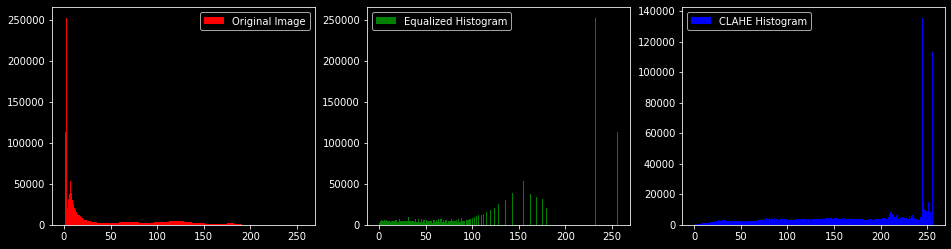

In [45]:
# Parametrarna är Visa histogram= True, clipLimit = 10, grid 4x4
bild1 = processImg(theList[0],True,10,4,4)
#showImg(bild1)

![title](church.png)


## Bild 2
- Här tycker jag equalizeHist gör den vita kyrkan alltför vit och CLAHE ger en mera jämn output

Image:thumbnail_Helsinki_Under-Exposed.jpg


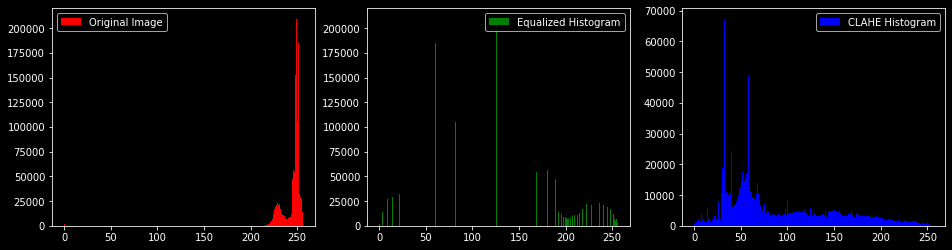

In [46]:

bild2 = processImg(theList[1],True,25 ,4,4)
#showImg(bild2)

![Helsinki](helsinki.png)

## Bild 3
- Här gör också equalizeHist hela bilden för ljus medan CLAHE pånytt gör ett bra jobb

Image:thumbnail_Fridge in a tree at Warmun_Dark.jpg


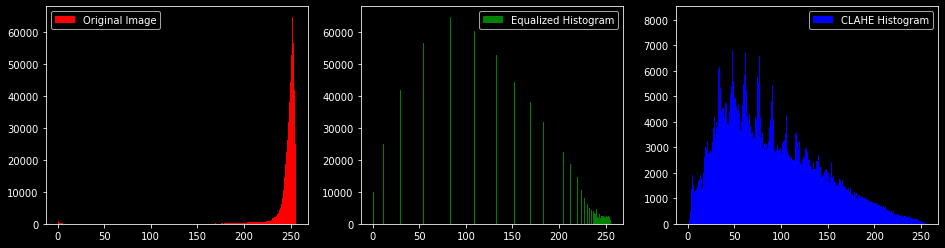

In [47]:
# Med att höja på clipLimit får man mer ljus i bilden men 14 tycker jag var ganska passligt för CLAHE
bild3 = processImg(theList[2],True,14)
#showImg(bild3) 

![Tree](tree.png)

# Uppgift 3

- Här har jag hittat en bild som inte ändrar destomera av histogram equalization.
- Orsaken är att bilden har en bra luminans balans mellan pixelvärden redan. Och det finns inte så mycket att jämna ut så att säga.
- Jag har satt till en extra bild av en snygg papegoja som jag tycker var ett bra exempel på CLAHE algoritmen. Den ser betydligt bättre ut en equalizeHist som har problemet att den gör för grova ändringar på vissa delar av bilden. Bilderna blir ofta för ljusa. Medan med CLAHE får man mera ljus på ljusa platser medan mörka delar hålls mörkka. Konturer och mönster syns bättre tex.

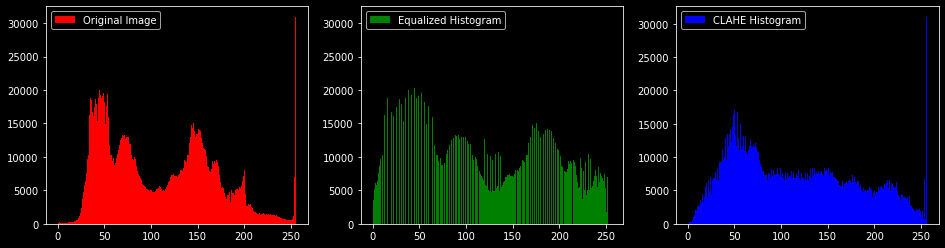

In [51]:
# Det här en modifierad version av processImg från de förra uppgifterna men denhär kan ta itu med RGB bilder med flera kanaler 
# Som parameter tar vi in bilden istället för filnamnet
def processImg2(input,showHist =False):
  # bilden till 8bit int numpy array
  img_np =  np.int_(input).astype(np.uint8)
  # equalizera
  img_equ = cv2.equalizeHist(input)
  # Add CLAHE
  clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(4,4))
  img_clahe = clahe.apply(input)
  # Visa bilderna
  if showHist:
    plt.figure(figsize=(16,4))
    
    plt.subplot(1,3,1)
    plt.hist(img_np.flatten(),256,[0,256], color = 'r', label="Original Image") 
    plt.legend()
    
    plt.subplot(1,3,2)
    plt.hist(img_equ.flatten(),256,[0,256],color = 'g', label="Equalized Histogram")
    plt.legend()

    plt.subplot(1,3,3)
    plt.hist(img_clahe.flatten(),256,[0,256], color = 'b', label="CLAHE Histogram") 
    plt.legend()
    plt.show()

  return {"np":img_np,"og": input, "eq":img_equ,"cl":img_clahe}

# Läs in en bild 
im = img.imread("bathroom.jpg")
# Vi behöver bilden som en kanal svart/vit
gim = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
pImg = processImg2(gim,True)
#showImg(pImg)

![bathroom](bathroom.png)

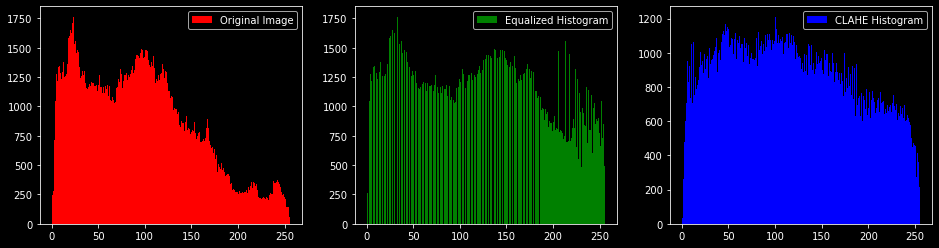

In [56]:
im = img.imread("bird.jpg")
gim = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
pImg = processImg2(gim,True)
#showImg(pImg)

![bird](bird_fin.png)